# Parking Log Data Analysis

In [1]:
import sqlite3
import pandas
from pandas import DataFrame
import matplotlib.pyplot as pyplot

In [2]:
connection_string :str = "../db.sqlite3"
#get all parking lot logs and parking lot names from the database
sql:str = "SELECT * FROM PerfectParking_parkinglotlog"
sql:str = "SELECT * FROM PerfectParking_parkinglotlog A INNER JOIN PerfectParking_parkinglot B ON A.parking_lot_id = B.id"

In [3]:
connection = sqlite3.connect(connection_string)
dataframe: DataFrame =pandas.read_sql_query(sql, connection)
connection.close()

In [4]:
dataframe.head()

,id,free_parking_spaces,time_stamp,logged_by_monitor_id,parking_lot_id,id,name,address,hours,isPaidParking,latitude,image,parking_spaces,longitude
0,80,3,2023-08-16 19:56:12.977554,1,1,1,Henry Street Left Strip,Henry Street,"Paid 09- 17, 2hr limit",1,52.663797,images/parking-lot/henry-street-left-strip-1_M...,3,-8.628752
1,81,3,2023-08-18 11:35:14.030294,1,1,1,Henry Street Left Strip,Henry Street,"Paid 09- 17, 2hr limit",1,52.663797,images/parking-lot/henry-street-left-strip-1_M...,3,-8.628752
2,82,3,2023-08-18 11:36:33.025428,1,1,1,Henry Street Left Strip,Henry Street,"Paid 09- 17, 2hr limit",1,52.663797,images/parking-lot/henry-street-left-strip-1_M...,3,-8.628752
3,83,8,2023-08-18 11:38:33.317363,2,2,2,O'Connell Street,"O'Connell Street, Limerick",09:00-17:00,1,52.662743,images/parking-lot/o-connell.png,12,-8.627916
4,84,7,2023-08-18 11:40:33.600452,3,5,5,Merchants Quay,"Merchants Quay, Limerick",09:00-17:00,1,52.667553,images/parking-lot/merchands-key.png,10,-8.624196


In [5]:
dataframe['time_stamp'] = pandas.to_datetime(dataframe['time_stamp'])
dataframe['hour'] = dataframe['time_stamp'].dt.hour


## Visualize the parking lot logs by hour

C:\Users\realRhys\AppData\Local\Temp\ipykernel_17592\70664724.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  pyplot.style.use('seaborn-whitegrid') # nice and clean grid


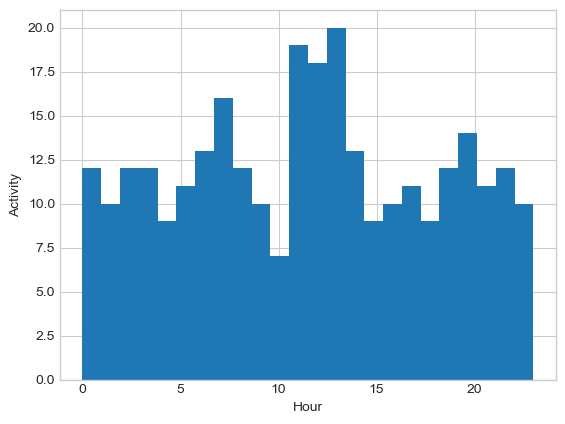

In [6]:
pyplot.style.use('seaborn-whitegrid') # nice and clean grid
#add labels
pyplot.xlabel('Hour')
pyplot.ylabel('Activity')
pyplot.hist(dataframe['hour'], bins=24);

# Visualize the busiest parking lots 


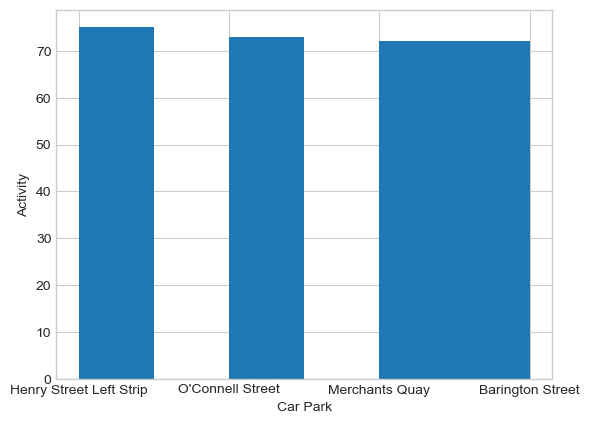

In [7]:
pyplot.xlabel('Car Park')
pyplot.ylabel('Activity')
pyplot.hist(dataframe['name'], bins=6);